In [35]:
import numpy as np #导入数值计算模块
import pandas as pd #导入数据处理模块
import matplotlib.pyplot as plt #导入绘图模块
from scipy.optimize import curve_fit as curve_fit #导入拟合模块
plt.rcParams["axes.unicode_minus"]=False #显示负号
import datetime as dt
import time

In [36]:
data=pd.read_csv("vaccination_china.csv") #读取数据
data['date'] = pd.to_datetime(data['date'])
date=data['date'] #日期
total_vaccinations=data['total_vaccinations'] 
t=range(len(total_vaccinations)) #构造横轴

In [23]:
print(t)

range(0, 122)


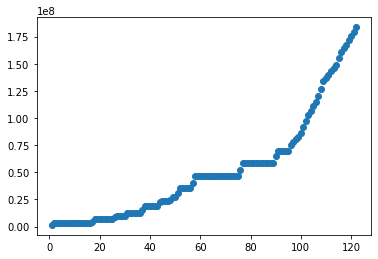

In [37]:
xdata = [ i+1 for i in range(len(total_vaccinations)) ]                  # 横坐标数据，以第几天表示
ydata = total_vaccinations                                    # 纵坐标数据，表示每天对应的病例数
plt.scatter(xdata, ydata, label='data') 

In [38]:
# S型曲线函数公式定义
def func(x, k, a, b):
 return k/(1+(k/b-1)*np.exp(-a*x))

# 非线性最小二乘法拟合
popt, pcov = curve_fit(func, xdata, ydata, method='dogbox', \
                        bounds=([1000., 0.01, 10.],[10000000., 1.0, 1000.]))
k = popt[0]
a = popt[1]
b = popt[2]

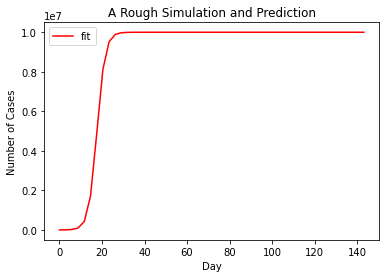

In [39]:
# 计算拟合数据后的数据
date_extend = 21 # 需要预测的天数
x = np.linspace(0, len(xdata)+date_extend)            # 横坐标取值
y = func(x, *popt)                                          # 纵坐标计算值 

# 作图
plt.plot(x, y,  color='r', label='fit')                      # 对拟合函数作图
plt.xlabel('Day')                                              # 打印横坐标标签
plt.ylabel('Number of Cases')                           # 打印纵坐标标签
plt.title('A Rough Simulation and Prediction')     # 打印图表名称
plt.legend(loc='best')                                      # 打印图例说明
plt.show( ) 